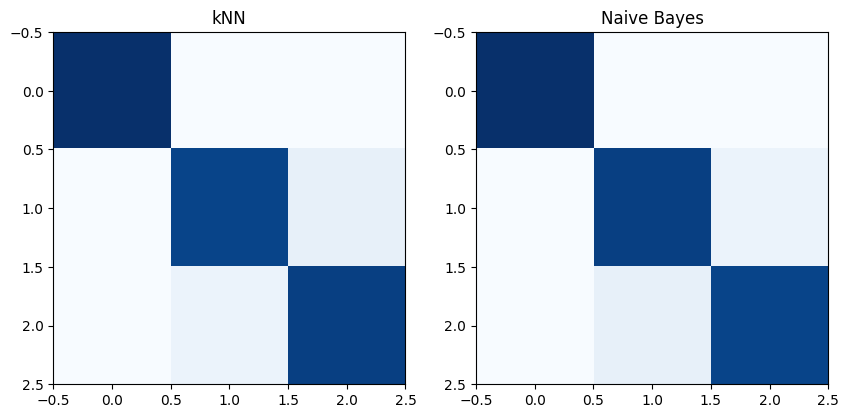

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a 10-fold stratified cross validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Create the classifiers
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
gnb = GaussianNB()

# Create the confusion matrices
knn_cm = np.zeros((3, 3))
gnb_cm = np.zeros((3, 3))

# Iterate through the folds
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the classifiers
    knn.fit(X_train, y_train)
    gnb.fit(X_train, y_train)

    # Compute the confusion matrices
    knn_cm += confusion_matrix(y_test, knn.predict(X_test))
    gnb_cm += confusion_matrix(y_test, gnb.predict(X_test))

# Plot the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(knn_cm, interpolation='nearest', cmap=plt.cm.Blues)
ax1.set_title('kNN')
ax2.imshow(gnb_cm, interpolation='nearest', cmap=plt.cm.Blues)
ax2.set_title('Naive Bayes')
plt.show()